In this note we would like to explain two concepts.
* What is Bias–Variance Tradeoff
* What __Polinomial Regression__ is. 

## Diabetes dataset

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets

diabetes = datasets.load_diabetes()

In [35]:
MAX_DEG = 20
X = np.concatenate([diabetes.data[:, [2]]**i for i in range(1, MAX_DEG+1)], axis=1)
y = diabetes.target

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666, test_size=0.1)

In [37]:
from sklearn.metrics import mean_squared_error

def fit_and_evaluate(columns, X_train, X_test, y_test):
    reg.fit(X_train[:, columns], y_train)
    y_train_hat = reg.predict(X_train[:, columns])
    y_test_hat = reg.predict(X_test[:, columns])
    return mean_squared_error(y_train, y_train_hat), mean_squared_error(y_test, y_test_hat)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
performance = pd.DataFrame(
        columns=["deg", "MSE_train", "MSE_test"]
    )

for i in range(1, MAX_DEG+1):
    mses = fit_and_evaluate(list(range(i)), X_train, X_test, y_test)
    new_row = pd.DataFrame({
        "deg": [i], 
        "MSE_train": [mses[0]],
        "MSE_test": [mses[1]]
    })
    performance = performance.append(new_row, ignore_index = True)  
performance

,deg,MSE_train,MSE_test
0,1,3977.857604,3119.609170
1,2,3977.640097,3115.818528
2,3,3971.426037,3107.879157
3,4,3965.465550,3138.183368
4,5,3934.569094,3196.018431
5,6,3913.773925,3228.384851
6,7,3906.374621,3263.682310
7,8,3900.895045,3257.609228
8,9,3869.394477,3282.880429
9,10,3854.682275,3289.644128


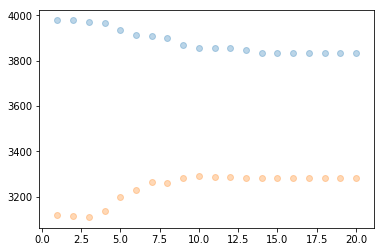

In [38]:
plt.scatter(performance["deg"], performance["MSE_train"], alpha = 0.3)
plt.scatter(performance["deg"], performance["MSE_test"], alpha = 0.3)

## Problem

__Main Question__ Which model is better?
1. Model that predict disease progression based on body mass.
2. Model that predict disease progression based on all 10 features.

We will answer this question doing the following steps.
1. Prepare data.
2. Split data into train and test.
3. Build a models and further data preparation for each model.
4. Fit models to train data on selected columns.
5. Evaluate models on test data and compare performance.

#### 1. Prepare data

Since the second model uses all columns our $X$ is simply entire dataset. When we will train model we will do further data selection.

In [2]:
X = diabetes.data
y = diabetes.target

#### 2. Split data into train and test.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666, test_size=0.1)

#### 3. Build a models

In [4]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()
reg2 = LinearRegression()

#### 4. Fit models to train data on selected columns.

In [5]:
reg1.fit(X_train[:, [2]], y_train) # here we choose only second column
reg2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### 5. Evaluate models on test data and compare performance.

In [6]:
from sklearn.metrics import mean_squared_error, r2_score
y_test_hat1 = reg1.predict(X_test[:, [2]])
y_test_hat2 = reg2.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_test_hat1)), np.sqrt(mean_squared_error(y_test, y_test_hat2))

(55.85346157514181, 47.61322195051475)

## All possible combinations of columns

In [7]:
from itertools import combinations

X = diabetes.data
y = diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666, test_size=0.2)
reg = LinearRegression()

def fit_and_evaluate(columns, X_train, X_test, y_test):
    reg.fit(X_train[:, columns], y_train)
    y_test_hat = reg.predict(X_test[:, columns])
    return np.sqrt(mean_squared_error(y_test, y_test_hat))

def get_performance_on_combinations_of_columns(X_train, X_test, y_test):
    all_columns_num = X_train.shape[1]
    all_colnames = list(range(all_columns_num))

    performance = pd.DataFrame(
        columns=["n_columns", "columns", "RMSE"]
    )

    for columns_num in range(1, all_columns_num + 1):
        for columns in combinations(all_colnames, columns_num):
            rmse = fit_and_evaluate(columns, X_train, X_test, y_test)
            new_row = pd.DataFrame({
                "n_columns": [columns_num], 
                "columns": [columns], 
                "RMSE": [rmse]
            })
            performance = performance.append(new_row, ignore_index = True)  
    return performance

In [8]:
performance = get_performance_on_combinations_of_columns(X_train, X_test, y_test) 
        
print("Total number of non-empty combination is {}.".format(len(performance)))

Total number of non-empty combination is 1023.


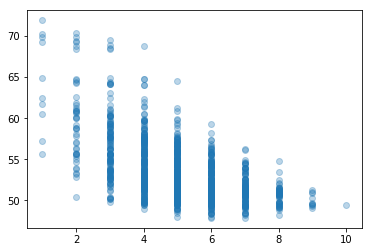

In [9]:
plt.scatter(performance["n_columns"], performance["RMSE"], alpha = 0.3)

In [10]:
performance.sort_values("RMSE").head()

,n_columns,columns,RMSE
781,6,"(1, 2, 3, 6, 8, 9)",47.880858
865,7,"(0, 1, 2, 3, 6, 8, 9)",47.889001
521,5,"(1, 2, 3, 6, 8)",48.020136
647,6,"(0, 1, 2, 3, 6, 8)",48.038394
981,8,"(0, 1, 2, 3, 6, 7, 8, 9)",48.210301


So the best choice of columns are columns: `(1, 2, 3, 6, 8, 9)`. Let's see what they are.

In [11]:
[diabetes.feature_names[i] for i in [1, 2, 3, 6, 8, 9]]

['sex', 'bmi', 'bp', 's3', 's5', 's6']

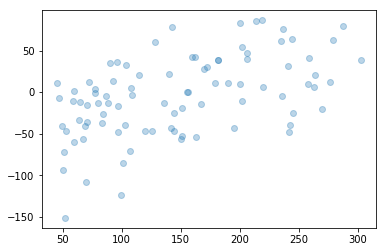

In [12]:
best_reg = LinearRegression()
best_reg.fit(X_train[:, (1, 2, 3, 6, 8, 9)], y_train)
y_test_hat = best_reg.predict(X_test[:, (1, 2, 3, 6, 8, 9)])
plt.scatter(y_test, y_test-y_test_hat, alpha = 0.3)

In [13]:
best_reg.coef_

array([-225.78647725,  533.21599131,  319.5160069 , -293.65810211,
        491.19212091,   35.45789137])

## Hyperparameters and train-dev-test split

Let us recall that by __parameters__ we understand coeficients of our model. In the case of our best model we have 7 parameters:

$$\hat{y} = a_1x_1 + a_2x_3 + a_3x_3 + a_6x_6 + a_8x_8 + a_9x_9 + b$$

where $a_1, a_2, a_3, a_6, a_8, a_9$ are

In [14]:
best_reg.coef_

array([-225.78647725,  533.21599131,  319.5160069 , -293.65810211,
        491.19212091,   35.45789137])

and $b$ (called also bias) is

In [15]:
best_reg.intercept_

153.00353416418773

However, as we have said before we have also another kind of parameters that are actully our choice of colums. Those are called __hyperparameters__. In order to find them we have also done some fitting. We have taken 1023 combinations and see which one has performed best on our test dataset. This is not very scientific, since we use this set to report final performance of our fitted model. Therefore we introduce further spliting of train set into validation set. 


1. Prepare data. 
2. Split data into train,  dev and test.
3. Build models, fit them to train dataset and evaluate on dev dataset.
4. Choose the hyperparameters of the model that performs best on dev.
5. Build and fit the model with these hyperparameters to both train and dev datasets.
5. Evaluate the best model performance of test.

In [16]:
# 1. Prepare data.
X = diabetes.data
y = diabetes.target
# 2. Split data into train,  dev and test.
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, random_state=666, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, random_state=667, test_size=0.25)

In [17]:
len(y_train), len(y_val), len(y_test)

(264, 89, 89)

In [18]:
# 3. Build models, fit them to train dataset and evaluate on dev dataset.

performance = get_performance_on_combinations_of_columns(X_train, X_val, y_val) 
performance.sort_values("RMSE").head()

,n_columns,columns,RMSE
765,6,"(1, 2, 3, 4, 5, 8)",56.184161
932,7,"(1, 2, 3, 4, 5, 6, 8)",56.211273
849,7,"(0, 1, 2, 3, 4, 5, 8)",56.262737
968,8,"(0, 1, 2, 3, 4, 5, 6, 8)",56.297644
936,7,"(1, 2, 3, 4, 5, 8, 9)",56.301163


In [19]:
# 4. Choose the hyperparameters of the model that performs best on dev.
best_columns = (1, 2, 3, 4, 5, 8)

# 5. Build and fit the model with these hyperparameters to both train and dev datasets.
c = LinearRegression()
best_reg.fit(X_train[:, best_columns], y_train)
y_test_hat = best_reg.predict(X_test[:, best_columns])
np.sqrt(mean_squared_error(y_test, y_test_hat))

48.79549385587892

## Exercises: Boston dataset

In this exercise we will use Boston Dataset to answer the following question.

__Question__ What is the best choice of columns for linear model of median value of owner-occupied homes?

Here we the data set.

In [20]:
from sklearn.datasets import load_boston
boston = load_boston()